Import Relevant Libraries, check if we can run on dedicated M1 chip

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device('cpu')
print('Running on cpu')

Running on cpu


Data Processing

In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, transform=torchvision.transforms.ToTensor(), download=True)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

torch.Size([3, 32, 32])


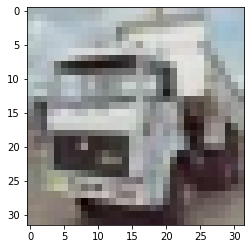

In [5]:
train_iter = iter(train_data_loader)
test_iter = iter(test_data_loader)

batch_images, batch_labels = next(train_iter)
image, label = batch_images[0], batch_labels[0]
plt.imshow(image.permute(1,2,0))
print(image.size())
plt.show()

In [6]:
class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, padding = 1)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(16 * 8 * 8, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, 10)
        
    def forward (self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x



In [7]:

model = MyNetwork()
model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.001)

Testing our model as before

In [8]:
def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    for i, batch in enumerate(train_loader):
        batch_inputs, batch_labels = batch
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)
        predictions = model(batch_inputs)
        loss = criterion(predictions, batch_labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print ('End of epoch loss:', round(loss.item(), 3))

In [15]:
def test(model, test_loader, device):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    model.eval()
    correct = 0

    for i, batch in enumerate(test_loader):
        batch_inputs, batch_labels = batch
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        predictions = model(batch_inputs)
        predictions = predictions.argmax(axis = 1)
        correct += (predictions == batch_labels).sum().item()

    print ('End of epoch accuracy:', 100*correct/len(test_dataset), '%')
    fig, axes = plt.subplots(2, 2)
    for i in range(4):
        print('Guess:', classes[predictions[i]], '| Label:' , classes[batch_labels[i]])
        axes[i//2, i % 2].imshow(batch_inputs[i].permute(1,2,0)) #.cpupy()
    plt.show()


Epoch:  1
End of epoch loss: 0.769
End of epoch accuracy: 61.15 %
Guess: frog | Label: frog
Guess: bird | Label: bird
Guess: dog | Label: frog
Guess: cat | Label: cat


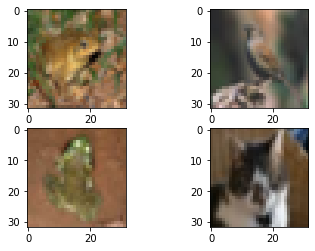

Epoch:  2
End of epoch loss: 1.098
End of epoch accuracy: 63.81 %
Guess: deer | Label: deer
Guess: horse | Label: deer
Guess: plane | Label: plane
Guess: deer | Label: deer


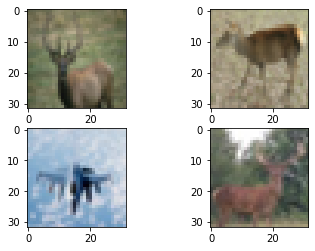

Epoch:  3
End of epoch loss: 0.841
End of epoch accuracy: 63.32 %
Guess: ship | Label: ship
Guess: car | Label: car
Guess: frog | Label: frog
Guess: dog | Label: dog


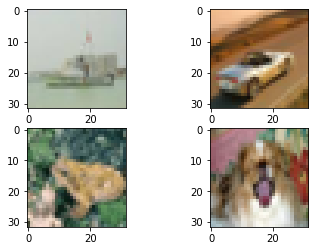

Epoch:  4
End of epoch loss: 0.706
End of epoch accuracy: 63.83 %
Guess: ship | Label: plane
Guess: horse | Label: horse
Guess: truck | Label: truck
Guess: cat | Label: cat


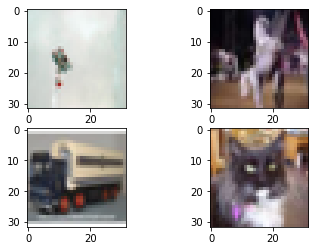

Epoch:  5
End of epoch loss: 1.393
End of epoch accuracy: 63.97 %
Guess: car | Label: car
Guess: truck | Label: truck
Guess: horse | Label: horse
Guess: horse | Label: horse


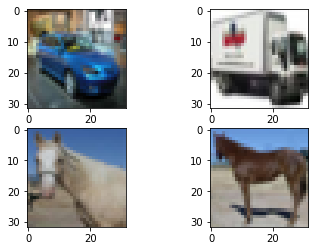

Epoch:  6
End of epoch loss: 1.275
End of epoch accuracy: 64.55 %
Guess: frog | Label: deer
Guess: truck | Label: truck
Guess: car | Label: car
Guess: horse | Label: horse


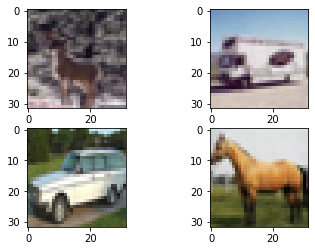

Epoch:  7
End of epoch loss: 0.685
End of epoch accuracy: 64.76 %
Guess: deer | Label: deer
Guess: dog | Label: dog
Guess: deer | Label: deer
Guess: truck | Label: truck


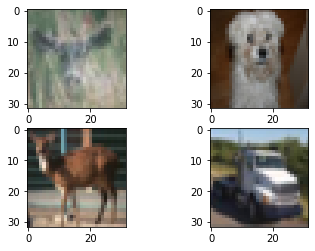

Epoch:  8
End of epoch loss: 1.226
End of epoch accuracy: 66.41 %
Guess: cat | Label: dog
Guess: ship | Label: ship
Guess: deer | Label: horse
Guess: deer | Label: deer


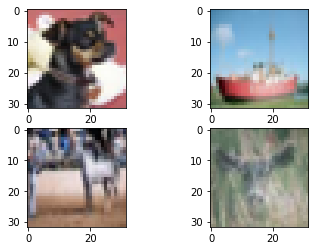

Epoch:  9
End of epoch loss: 0.758
End of epoch accuracy: 65.28 %
Guess: car | Label: car
Guess: truck | Label: plane
Guess: plane | Label: plane
Guess: dog | Label: dog


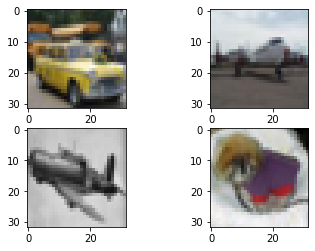

Epoch:  10
End of epoch loss: 1.043
End of epoch accuracy: 65.63 %
Guess: deer | Label: deer
Guess: bird | Label: deer
Guess: car | Label: ship
Guess: horse | Label: horse


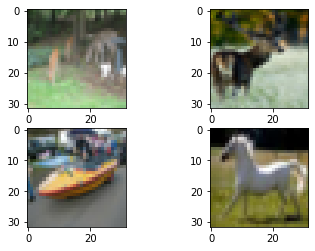

In [16]:
for epoch in range(10):
    print("Epoch: ", epoch+1)
    train_epoch(model, train_data_loader, optimizer, criterion, device)
    test(model, test_data_loader, device)

In [ ]:
torch.save(model.state_dict(),'./CIFARworking.pt')